<a href="https://colab.research.google.com/github/Tdas-christ/Machine_Learning/blob/main/2348569_PCA_DTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**DATA PREPROCESSING**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [64]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [65]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [66]:
df.isnull().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [67]:
columns_impute = ['ph', 'Sulfate', 'Trihalomethanes']
df[columns_impute] = df[columns_impute].apply(lambda col: col.fillna(col.mean()))

In [68]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [69]:
corr_matrix = df.corr()

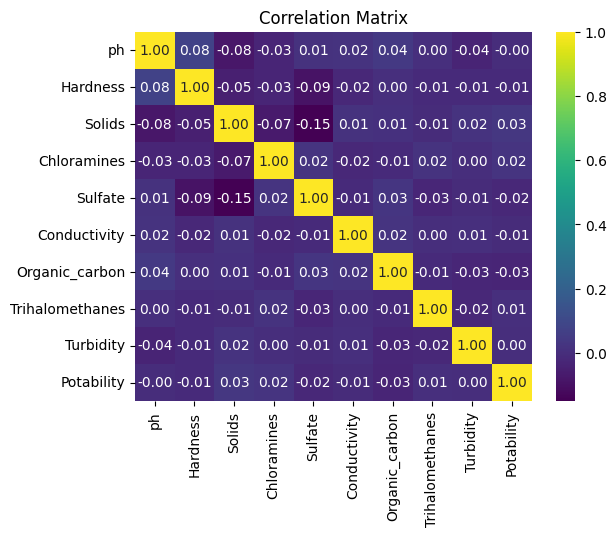

In [70]:
sns.heatmap(corr_matrix, fmt = '.2f', cmap='viridis', annot=True)
plt.title('Correlation Matrix')
plt.show()

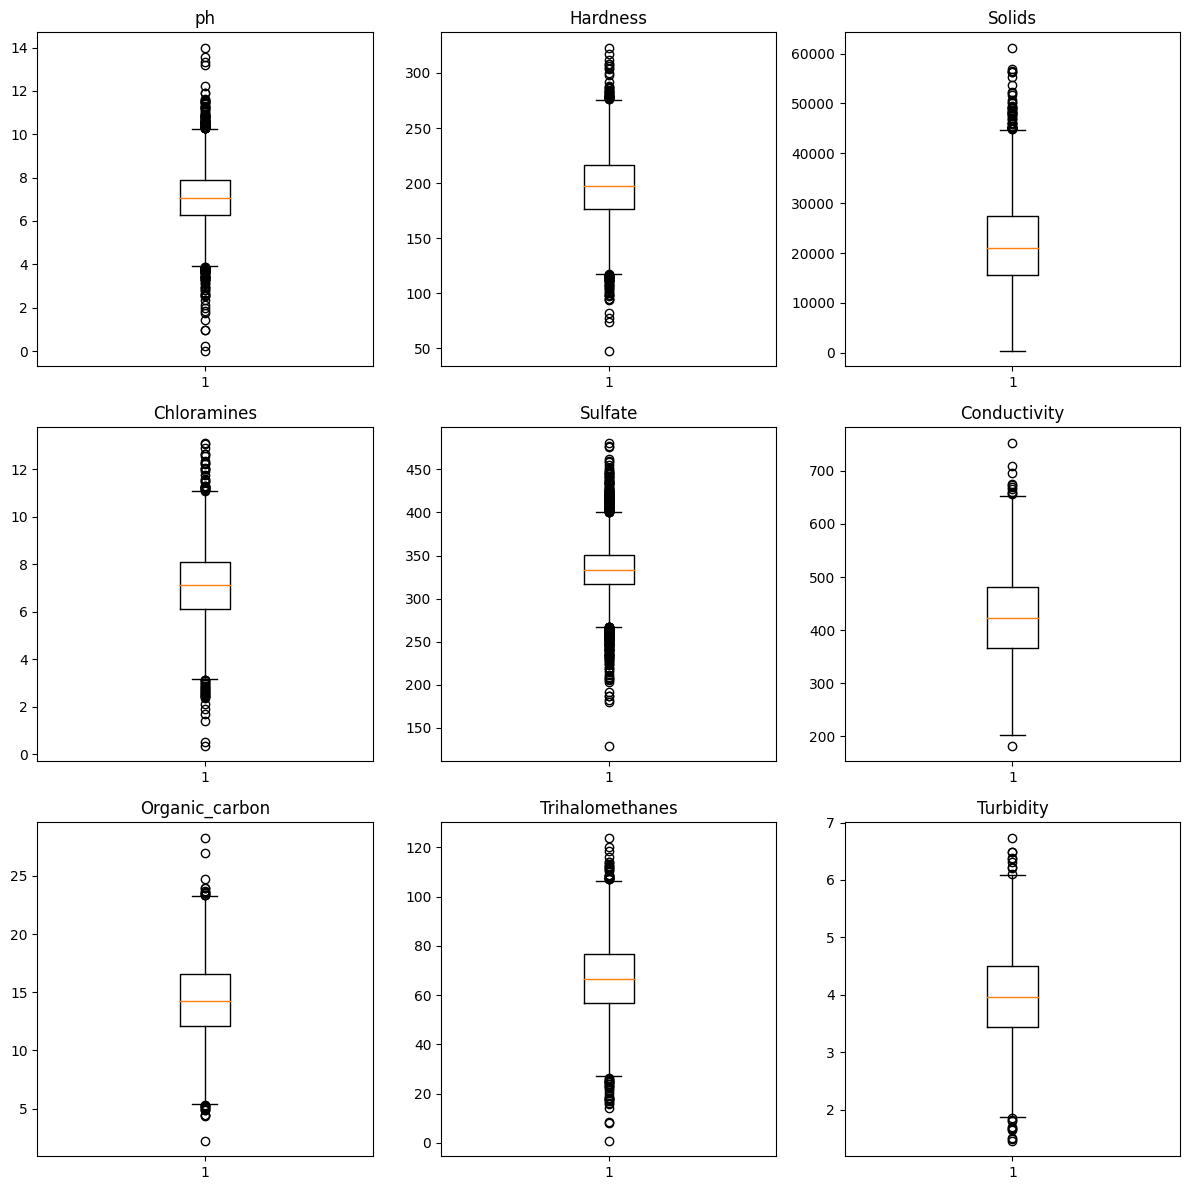

In [71]:
X = df.drop(columns='Potability', axis=1)
num_attributes = len(X.columns)
num_cols = 3
num_rows = -(-num_attributes // num_cols)

fig_width = 4 * num_cols
fig_height = 4 * num_rows

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].boxplot(X[col])
    axes[i].set_title(col)

plt.tight_layout()

plt.show()

In [72]:
from sklearn.model_selection import train_test_split
Y = df[['Potability']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled

array([[-0.0089824 , -0.24699831,  0.75053604, ..., -1.11745208,
        -0.20234542, -0.93893423],
       [ 0.07488172, -0.85645535,  0.08009625, ...,  0.65600216,
        -0.12232603,  3.12613141],
       [-0.0089824 ,  1.4101707 ,  0.80745866, ..., -2.68242954,
        -0.00327098, -0.56055613],
       ...,
       [-0.31698661, -0.29832594,  0.9918901 , ..., -0.13267988,
         1.27879668, -0.60170937],
       [ 1.15509923,  0.65460822, -0.66652007, ...,  0.63894108,
        -1.21848478,  0.40600947],
       [-0.27063182,  0.05287723,  1.41188532, ..., -0.63085449,
        -0.00327098, -0.25756054]])

In [75]:
from sklearn.decomposition import PCA
n_components = 5
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, Y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
Y_pred = clf.predict(X_test_pca)

In [78]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(Y_test, Y_pred))

Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       617
           1       0.40      0.42      0.41       366

    accuracy                           0.55       983
   macro avg       0.52      0.52      0.52       983
weighted avg       0.55      0.55      0.55       983



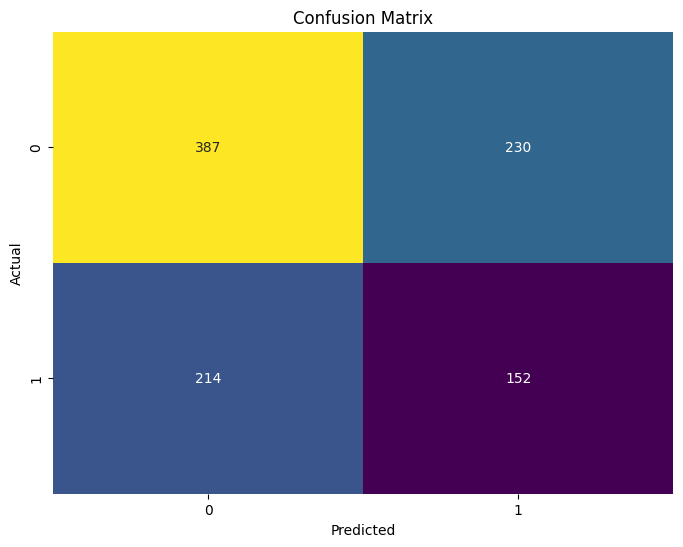

In [79]:
conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False,
            xticklabels=clf.classes_, yticklabels=clf.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

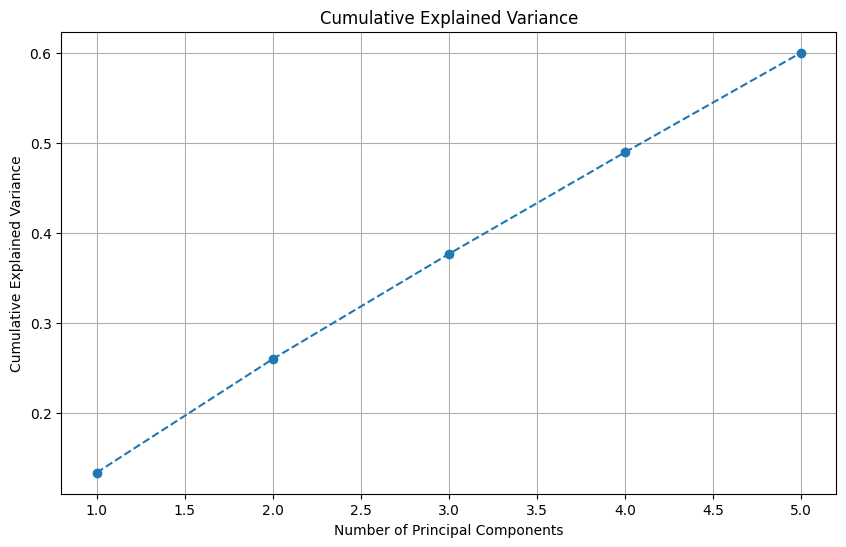

In [80]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()